In [1]:
import os
import numpy as np

from Airfoils import airfoil as af

from Visualization import plotting as aplt
from Database.getresults import Database_2D

In [2]:
HOMEDIR = os.getcwd()

In [31]:
type(db.getAirfoils)

method

In [32]:
db = Database_2D(HOMEDIR)
airfoil = db.getAirfoils()[0]
reynolds = db.getReynolds(airfoil)[0]
polars = db.Data[airfoil][reynolds]


In [33]:
from Flight Dynamics.Trim import Trim

SyntaxError: invalid syntax (2457126793.py, line 1)

In [16]:
polars['Foil2Wake']


,3.50000000 0.634320974 2.38230005E-02 -5.86219989E-02
0,1.00000000 0.406453013 2.3310000...
1,6.50000000 0.870447993 2.6334999...
2,-1.00000000 0.206009999 2.3267000...
3,4.00000000 0.677489996 2.4026999...
4,-0.500000000 0.254824996 2.3283999...
5,5.50000000 0.798424006 2.5071000...
6,0.00000000 0.303088009 2.3326000...
7,6.00000000 0.835587025 2.5629000...
8,-1.50000000 0.157113999 2.3281000...
9,1.50000000 0.453579992 2.3357000...


ValueError: too many values to unpack (expected 4)

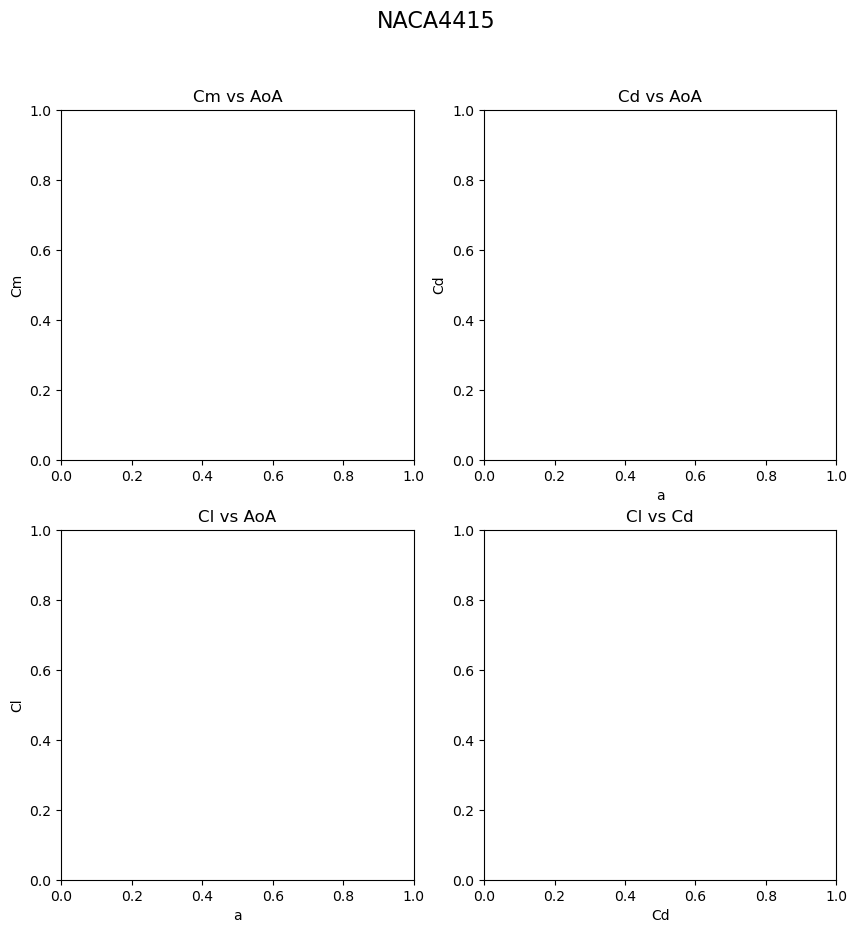

In [8]:
f2wD = [polars["Foil2Wake"].values, "rx", f"Re = {reynolds} |Foil2Wake tripped"]
Xfoil = [polars["Xfoil"].values, "bx", f"Re = {reynolds} |XFoil"]
openF = [polars["OpenFoam"].values, "kx", f"Re = {reynolds} |OpenFoam"]
aplt.plotAeorCoeffs([Xfoil,f2wD,f2wD],(10,10),airfoil)